# Pru Wealth Data Test

Below we will explore a mock database of customers, policies and funds that are similar to the Pru Wealth data. The first section of this notebook will test your SQL skills, the second section will test your Python skills and visualisation skills.

The database file is called Prudential_Data.db

The three tables included in this database are:
* Customer_Table
* Policy_Table
* Fund_Table

You will need to have the following packages installed in your Python environment:
* numpy
* pandas
* sqlite3

For visualization use any package of your choice (e.g., matplotlib, seaborn, plotly).

Please complete and return the test before the deadline by emailing your copy of this notebook to: Denholm.Hesse@Prudential.co.uk. If you do not know the answer to a question feel free to use Google and Stack Overflow. This is to give you the option to teach yourself a concept from the internet to address a question which you do not know the answer to, please refrain from skipping questions. The test is meant to be completed by you only.

Good luck and have fun!

In [1]:
import numpy as np
import pandas as pd
import sqlite3

# SQL test

IMPORANT: Please make sure all questions in this section are solved using SQL by only editing the content of the variable *sqlite_query*. Please do not edit the below cell:

In [2]:
# Establish DB connection
conn = sqlite3.connect('Prudential_Data.db')

Below is an example of how to query the SQLlite databse from this Jupyter notebook. Please note that SQLlite might have a slightly different syntax from the SQL you normally use. Please do not edit the below cell:

In [3]:
sqlite_query = """
SELECT COUNT(*) 
from policy_table 
"""

pd.read_sql(sqlite_query, conn)

,COUNT(*)
0,1635


The first table "Customer_Table" contains personal information about the customers. Please do not edit the below cell:

In [4]:
sqlite_query = """
SELECT * 
from Customer_Table 
limit 5
"""

pd.read_sql(sqlite_query, conn)

,index,Customer ID,Email,Gender,Age,Postcode
0,0,CO183683,NLUPPITT14@PARALLELS.COM,Male,90,None
1,1,CO314757,None,Female,90,None
2,2,CO720602,None,Female,90,None
3,3,CO34804,None,Female,90,1495-701
4,4,CO474411,None,Male,90,301288


The second table "Policy_Table" contains data relating to customer policies. The policy value is the current value of the policy. Please do not edit the below cell:

In [5]:
sqlite_query = """
SELECT * 
from Policy_Table 
limit 5
"""

pd.read_sql(sqlite_query, conn)

,index,Policy Number,Customer ID,Product Category,Product Name,Policy Value,Policy Start Date
0,0,RET100072,CO276506,RETIREMENT,RETIREMENT ACCOUNT,270033.0,2016-01-02 00:00:00
1,1,RET100931,CO831289,RETIREMENT,RETIREMENT ACCOUNT,26394.0,2016-01-04 00:00:00
2,2,RET100682,CO784249,RETIREMENT,RETIREMENT ACCOUNT,773567.0,2016-01-04 00:00:00
3,3,RET100447,CO295533,RETIREMENT,RETIREMENT ACCOUNT,35512.0,2016-01-07 00:00:00
4,4,RET100390,CO901735,RETIREMENT,RETIREMENT ACCOUNT,767580.0,2016-01-08 00:00:00


The final table "Fund_Table" contains historic data on the Policy Value (Policy_Value_Snapshot). The Policy_Value_Snapshot represents the value of the policy and the Date column is the date at which that value was recorded. The value may have changed overtime due to changes in the fund price or quanity of units the policy was invested in. Please do not edit the below cell:

In [6]:
sqlite_query = """
SELECT 
*
from Fund_Table
limit 5

"""

pd.read_sql(sqlite_query, conn)

,index,Policy Number,Customer ID,Date,Product Category,Product Name,Policy_Value_Snapshot
0,0,ANN1221,CO408564,2009-10-31 00:00:00,ANNUITY,STANDARD ANNUITY,None
1,1,ANN1221,CO408564,2009-11-30 00:00:00,ANNUITY,STANDARD ANNUITY,None
2,2,ANN1221,CO408564,2009-12-31 00:00:00,ANNUITY,STANDARD ANNUITY,None
3,3,ANN1221,CO408564,2010-01-31 00:00:00,ANNUITY,STANDARD ANNUITY,None
4,4,ANN1221,CO408564,2010-02-28 00:00:00,ANNUITY,STANDARD ANNUITY,None


If a question requires additional explanation for your answer, please add additional cells below the code. 

## Q1: What is the current average policy value split by each product name? 

In [7]:
sqlite_query = """select  "Product Name", avg("Policy value") as Avg_Policy_Value from 
Policy_Table group by "Product Name"

"""

pd.read_sql(sqlite_query, conn)

,Product Name,Avg_Policy_Value
0,CORPORATE MEMBERSHIP,5697.285714
1,FOCUSSED ISA,5746.341270
2,NHS PENSION,5241.500000
3,PRU BOND,4516.389831
4,PRUDENTIAL INVESTMENT PLAN,5084.515152
5,PRUDENTIAL ISA,5161.135593
6,RETIREMENT ACCOUNT,504964.959960
7,SIPP,5335.842466
8,STANDARD ANNUITY,NaN


## Q2: How many customers opened a new policy in Q1 2017 who already had an existing pension product? 

In [8]:
sqlite_query = """ select count(pt."customer ID") as Q1_New_Acc_Count from Policy_table as pt
inner join (SELECT "customer ID"  from 
Policy_table where "Product Category" like '%Pension%' 
and strftime('%Y',"Policy Start Date")<"2017") as pen_cust on pt."customer ID" =pen_cust."customer ID" 
where "Product Category" not like '%Pension%' and 
(strftime('%m',pt."Policy Start Date")+2)/3=1 and 
strftime('%Y',pt."Policy Start Date")="2017"
"""
pd.read_sql(sqlite_query, conn)


,Q1_New_Acc_Count
0,35


## Q3: What was the customer ID that had the biggest difference in policy value between its earliest and latest date (for any product) ?

In [9]:
sqlite_query = """

select pt."Customer ID" 
from Policy_table as pt inner join 

(select "Customer ID","Product Name","Policy Number",Policy_Value_Snapshot,Date,
Row_Number() over(PARTITION BY "Customer ID","Policy Number"
ORDER BY Date asc) as RowNum from Fund_Table) as ft

on ft."Customer ID"=pt."Customer ID" and pt."Policy Number"=ft."Policy Number" and ft.RowNum=1 

order by  abs(pt.'Policy Value'-ft.Policy_Value_Snapshot) desc limit 1

"""

pd.read_sql(sqlite_query, conn)

,Customer ID
0,CO401070


# Python Test

Same data, but now let's have some fun in python. Please do not use SQL for this part of the exercise. 

Feel free to add more cells of code or text

In [10]:
Customer_Table = pd.read_sql('SELECT * FROM Customer_Table', conn)
Policy_Table = pd.read_sql('SELECT * FROM Policy_Table', conn)
Fund_Table = pd.read_sql('SELECT * FROM Fund_Table', conn)

## Q4: Produce a list of customers which have an invalid email address. What do you notice about these customers? ##

Feel free to use any packages of your choice

In [11]:

#Insert your answer below: 
Customer_Table['Email'].fillna('Missing',inplace=True)

Email_issue=Customer_Table.loc[~(Customer_Table['Email'].str.match(r'^[a-zA-Z0-9][\w\.\-+]*@[A-Za-z0-9\-]{,63}\.[A-Za-z]{2,4}') )]

Email_issue['Email'].value_counts()


Missing                     47
CUSTOMER TO FOLLOW UP        1
TGADDIEHB@TOPSY              1
NOEMAIL                      1
.                            1
VPEGGSK3@@@SPRINGER.COM      1
ALOWSELYHF@#AMAZON.CO.JP     1
Name: Email, dtype: int64

# Reframe the comments

- 47 Customers didnt provide the email ID
- 2 customers filled email Id with extract special character such as @ and #.
- 1 customer forget to add domain extension
- 2 customers filled data but not email ids
- 1 need to follow up customer for details.
- Currently email Id is not validated at UI level.

#####  All the points are based on the assumption that clients have entered all the detail using UI during policy enrollment.


## Q5: The Managing Director of Pru Wealth needs to see how policy value differs between other variables in the database (e.g. customer demographics) . They don't have time to read a report, so have asked for a cool visualisation that tells a story.

Visualise something cool, tell us a story! You can use packages like Matplotlib, Seaborn or Plotly.Tell us why you chose to visualise the data in this way and how it can be used from a business perspective.


In [17]:
import matplotlib.pyplot as plt
from matplotlib.collections import EventCollection

In [28]:
data=Customer_Table.merge(Policy_Table,how='inner',on='Customer ID')
data.corr()

,index_x,Age,index_y,Policy Value
index_x,1.000000,-0.973055,-0.007388,-0.000105
Age,-0.973055,1.000000,0.014635,0.003151
index_y,-0.007388,0.014635,1.000000,-0.559933
Policy Value,-0.000105,0.003151,-0.559933,1.000000


AttributeError: 'Series' object has no attribute 'sort'

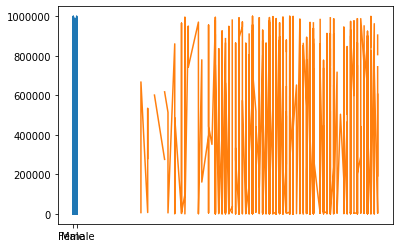

In [23]:
xdata1=data['Gender']
xdata2=d['Age']
ydata=d['Policy Value']

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(xdata1, ydata, color='tab:blue')
ax.plot(xdata2, ydata, color='tab:orange')

# create the events marking the x data points
xevents1 = EventCollection(xdata1, color='tab:blue', linelength=0.05)
xevents2 = EventCollection(xdata2, color='tab:orange', linelength=0.05)

# create the events marking the y data points
yevents1 = EventCollection(ydata1, color='tab:blue', linelength=0.05,
                           orientation='vertical')
yevents2 = EventCollection(ydata2, color='tab:orange', linelength=0.05,
                           orientation='vertical')

# add the events to the axis
ax.add_collection(xevents1)
ax.add_collection(xevents2)
ax.add_collection(yevents1)
ax.add_collection(yevents2)

# set the limits
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])

ax.set_title('line plot with data points')

In [12]:
# Insert your answer below: 
